# Worksheet 12

Name: Ketan Suhaas Saichandran\
UID: U68176921

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Classification
2. Not Classification
3. Classification
4. Not Classification

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

To set up and evaluate a machine learning model effectively, follow these steps:

1. Prepare your data, split it into training and testing sets, and address missing data and outliers.
2. Choose good features that are relevant, non-redundant, and informative. Consider the trade-off between simplicity and performance
3. Be cautious about assuming causation from correlation.
4. Select an appropriate machine learning algorithm and train the model on the training data.
5. Utilise a validation set to tune the hyperparameters.
6. Evaluate the model's performance on the testing dataset, using metrics like accuracy or mean squared error
7. Check for overfitting and underfitting.
8. Implement cross-validation techniques for robust evaluation.
9. Interpret the model's output, and deploy it if it performs well.
10. Monitor the model's performance and retrain it as needed.
11. Consider the practical value and ethical implications of your model's predictions.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

- **Underfitting**: Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. It results in a model that is overly generalized and doesn't fit the training data well. Signs of underfitting include high training and testing errors, where the model's performance is poor on both the training and testing datasets. The model lacks the capacity to understand and represent the data's complexity.

- **Overfitting**: Overfitting happens when a machine learning model is too complex and starts fitting not only the underlying patterns but also the noise or random fluctuations in the training data. Signs of overfitting include low training error (the model fits the training data well) but high testing error (the model performs poorly on new, unseen data). The model essentially memorizes the training data but fails to generalize to new examples.

In summary, underfitting results from a model that is too simple, leading to poor performance on both training and testing data. Overfitting arises from an overly complex model that fits noise in the training data, causing poor generalization to new data. A well-fitted model finds a balance between simplicity and complexity, accurately capturing the data's underlying patterns without fitting noise.

### K Nearest Neighbors

In [144]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

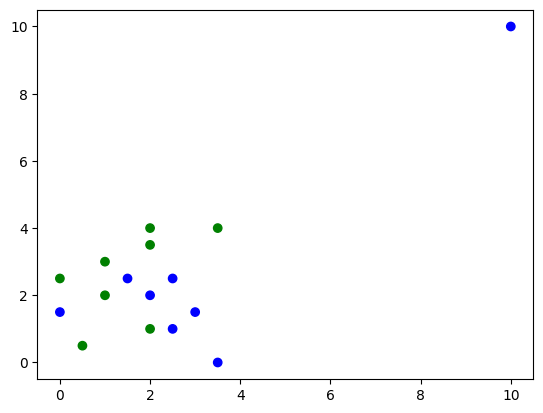

In [145]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes. There is (10,10), which is a conspicuous outlier.

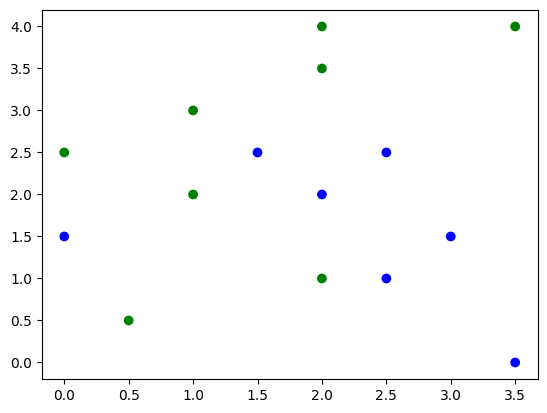

In [146]:
data['Attribute A'].pop()
data['Attribute B'].pop()
data['Class'].pop()
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'],data['Attribute B'],color=colors[data["Class"]].tolist())
plt.show()


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Yes, there is (0, 1.5) which is clearly a noise point.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

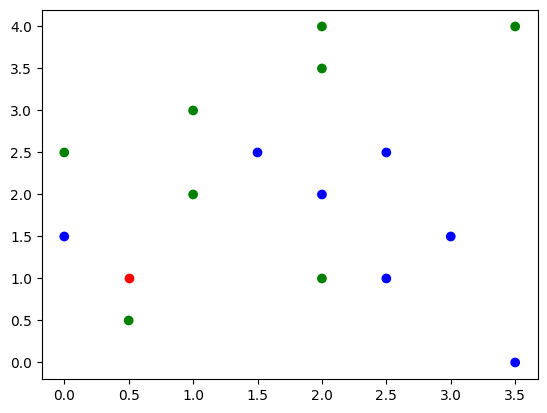

In [147]:
plt.scatter(data['Attribute A'],data['Attribute B'],color=colors[data["Class"]].tolist())
plt.scatter([0.5],[1],color=colors[2])
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

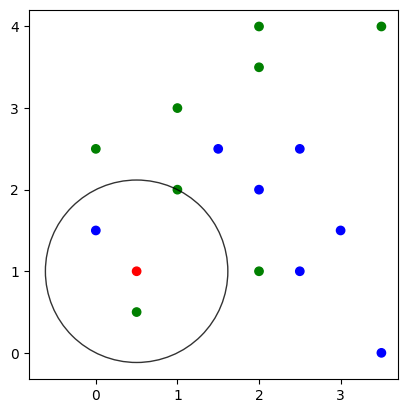

In [151]:
def n_closest_to(example, n, data):
    attribute_a = np.array(data["Attribute A"])
    attribute_b = np.array(data["Attribute B"])
    distances = np.sqrt((attribute_a - example[0])**2 + (attribute_b - example[1])**2)
    closest_indices = np.argsort(distances)[:n]
    radius = distances[closest_indices[-1]]
    return (closest_indices, radius)

location = (0.5, 1)
closest_indices, radius = n_closest_to(location, 3, data)
_, axes = plt.subplots()
data["Attribute A"].append(location[0])
data["Attribute B"].append(location[1])
data["Class"].append(2)
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()
for key in data:
    data[key] = data[key][:-1]

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [152]:
def majority(points, data):
    closest_classes = [data["Class"][i] for i in points]
    class_counts = {0: 0, 1: 0}
    for cls in closest_classes:
        class_counts[cls] += 1
    majority_class = max(class_counts, key=class_counts.get)
    default_class = 0
    if list(class_counts.values()).count(class_counts[majority_class]) > 1:
        return default_class
    return majority_class

print(majority(closest_indices, data))

1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

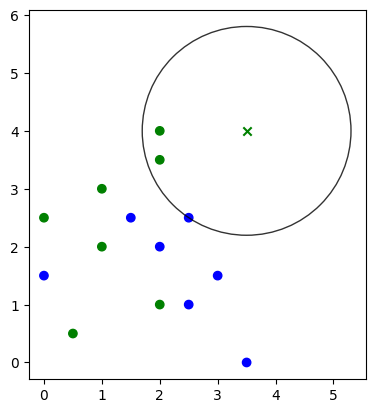

(3.5, 4) 1
2 4 1
2 3.5 1
2.5 2.5 0


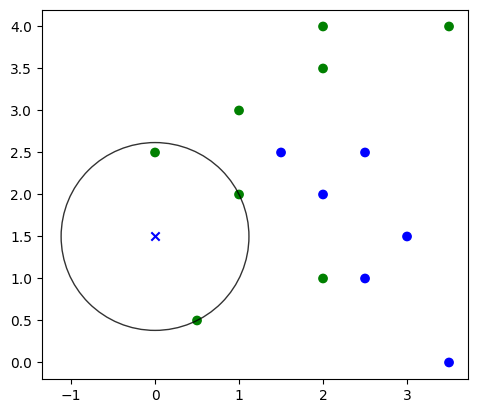

(0, 1.5) 1
0.0 2.5 1
1 2 1
0.5 0.5 1


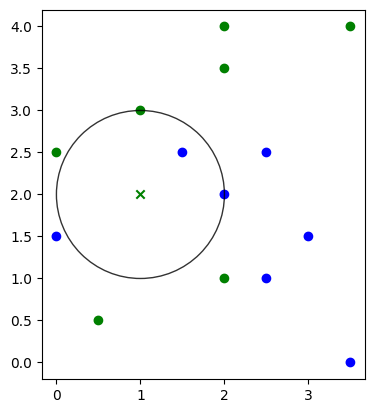

(1, 2) 0
1.5 2.5 0
1 3 1
2 2 0


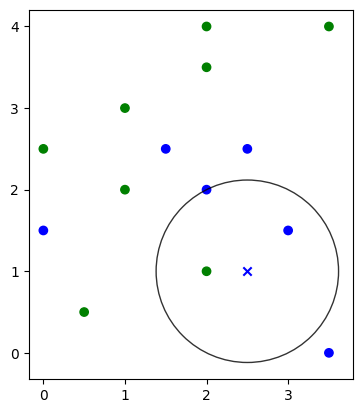

(2.5, 1) 0
2 1 1
3 1.5 0
2 2 0


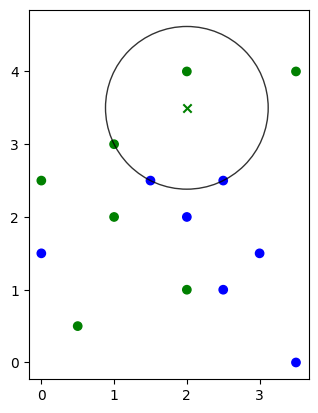

(2, 3.5) 1
2 4 1
1.5 2.5 0
1 3 1


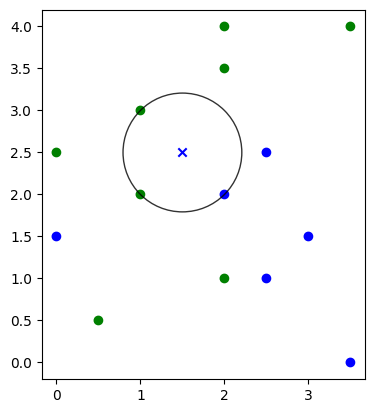

(1.5, 2.5) 1
1 2 1
1 3 1
2 2 0


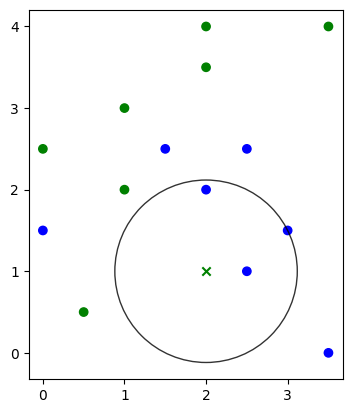

(2, 1) 0
2.5 1 0
2 2 0
3 1.5 0


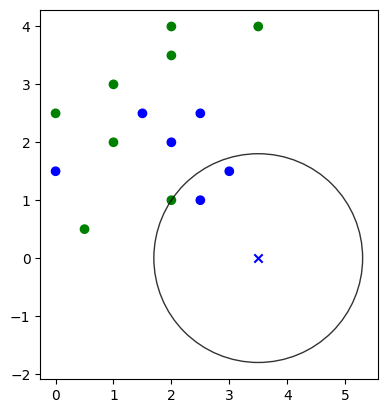

(3.5, 0) 0
2.5 1 0
3 1.5 0
2 1 1


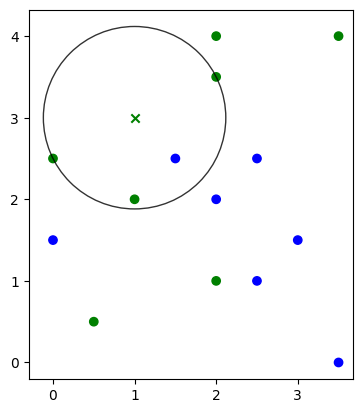

(1, 3) 1
1.5 2.5 0
1 2 1
2 3.5 1


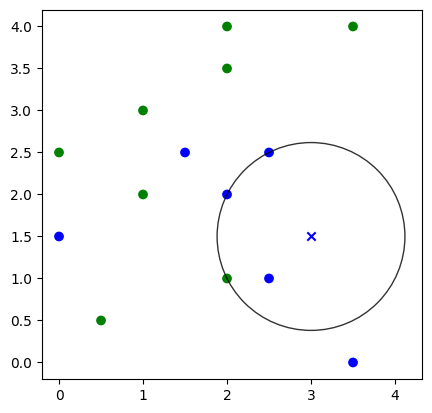

(3, 1.5) 0
2.5 1 0
2 1 1
2 2 0


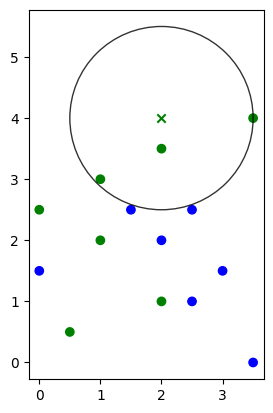

(2, 4) 1
2 3.5 1
1 3 1
3.5 4 1


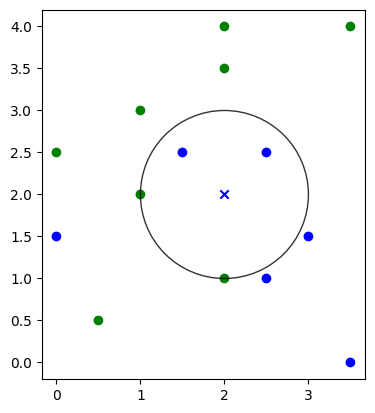

(2, 2) 0
1.5 2.5 0
2.5 2.5 0
1 2 1


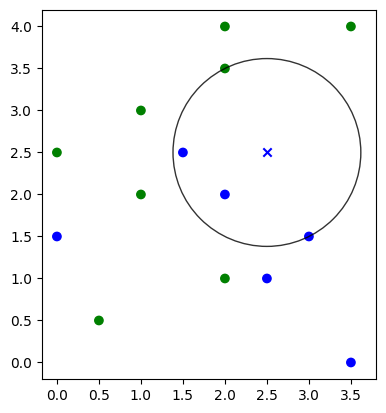

(2.5, 2.5) 0
2 2 0
1.5 2.5 0
2 3.5 1


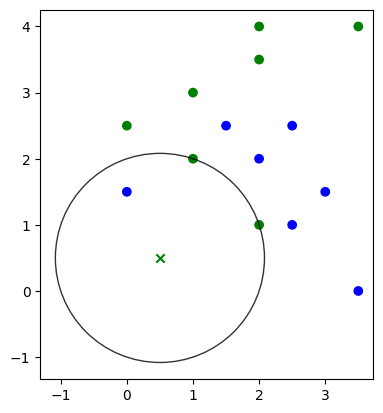

(0.5, 0.5) 1
0 1.5 0
1 2 1
2 1 1


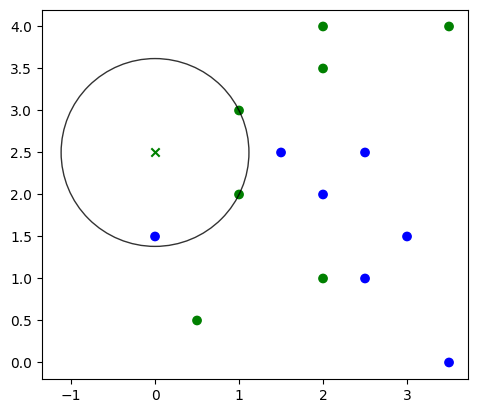

(0.0, 2.5) 1
0 1.5 0
1 2 1
1 3 1
Overall Accuracy = 0.7333333333333333


In [158]:
count = 0
for i in range(len(data["Attribute A"])):
    test_example = (data["Attribute A"][i], data["Attribute B"][i])
    test_class = data["Class"][i]

    training_data = {
        "Attribute A": [x for j, x in enumerate(data["Attribute A"]) if j != i],
        "Attribute B": [x for j, x in enumerate(data["Attribute B"]) if j != i],
        "Class": [x for j, x in enumerate(data["Class"]) if j != i]
    }
    closest_indices, radius = n_closest_to(test_example, 3, training_data)
    _, axes = plt.subplots()
    axes.scatter(training_data["Attribute A"], training_data["Attribute B"], color=colors[training_data["Class"]].tolist())
    axes.scatter(test_example[0],test_example[1],color=colors[test_class],marker='x')
    cir = plt.Circle(test_example, radius, fill = False, alpha=0.8)
    axes.add_patch(cir)
    axes.set_aspect('equal') # necessary so that the circle is not oval
    plt.show()
    prediction = majority(closest_indices, training_data)
    print(test_example,prediction)
    for i in closest_indices:
        print(training_data['Attribute A'][i],training_data['Attribute B'][i],training_data['Class'][i])

    if prediction == test_class:
        count += 1

overall_accuracy = count / len(data["Attribute A"])
print("Overall Accuracy =", overall_accuracy)


   

